# Определение неисправностей в подшипниках через анализ экспериментальных данных


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Предиктивное обслуживание** — это стратегия непрерывного мониторинга состояния оборудования при стандартных условиях эксплуатации и прогнозирования оставшегося срока его службы. Реактивное и превентивное техобслуживание помогает снижать количество сбоев или просто предотвращать их, в то время как предиктивное обслуживание использует модели для предсказания сбоев компонентов конкретной единицы. В предиктивном обслуживании решают задачу обнаружения аномалий для оценки работоспособности деталей узлов оборудования за счет выявления отклонения значений от нормального распределения.




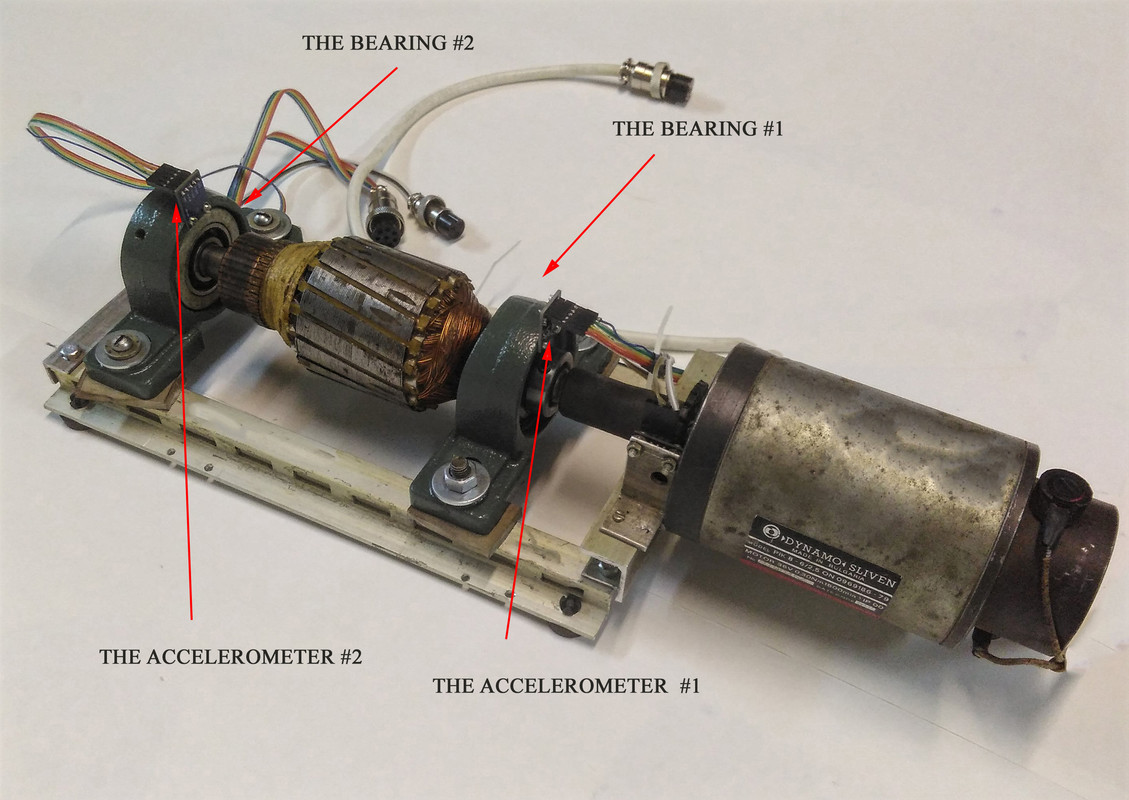

## Постановка задачи

**Задача:** анализ данных экспериментов с подшипниками с целью обнаружения неисправных.

Есть данные о работе подшипников (bearings):
*  *a1_x* — ускорение для оси *X* для первого подшипника (м/с$^2$)
*  *a1_y* — ускорение для оси *Y* для первого подшипника (м/с$^2$)
*  *a1_z* — ускорение для оси *Z* для первого подшипника (м/с$^2$)
*  *a2_x* — ускорение для оси *X* для второго подшипника (м/с$^2$)
*  *a2_y* — ускорение для оси *Y* для второго подшипника (м/с$^2$)
*  *a2_z* — ускорение для оси *Z* для второго подшипника (м/с$^2$)
*  hz — скорость вращения двигателя (Гц)



Классы подшипников:
*  Status = 1 — означает, что подшипник нормальный.
* Status = 0 — означает, что подшипник с дефектами.

Необходимо:
- загрузить данные;
- сделать выборку;
- проанализировать статистику показателей и разметки;
- сгенерировать дополнительные показатели (признаки).

## Загрузка и начальная обработка данных

In [ ]:
import numpy as np
import pandas as pd

import plotly.express as px # library for plotting
import matplotlib.pyplot as plt

dir = '/content/drive/MyDrive/AML'

#dir = '/content/drive/MyDrive/Advanced ML course/Module 1/Video/input'

import os
for dirname, _, filenames in os.walk(dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/AML/bearing_classes.csv


In [ ]:
signals = pd.read_csv(dir+'/bearing_signals.csv', low_memory=False)

In [ ]:
labels = pd.read_csv(dir+'/bearing_classes.csv',sep=";")

Вывод таблицы по экспериментам с подшипниками

In [ ]:
signals

,experiment_id,bearing_1_id,bearing_2_id,timestamp,a1_x,a1_y,a1_z,a2_x,a2_y,a2_z,hz
0,1,0,1,0.000000,0.113269,0.149706,-0.110275,-0.186030,0.194450,0.454299,0.000000
1,1,0,1,0.000333,-0.367713,-0.228832,0.177821,0.285992,0.002226,-0.043930,0.000000
2,1,0,1,0.000667,0.113269,0.149706,-0.398371,-0.091625,0.002226,0.454299,0.000000
3,1,0,1,0.001000,-0.175320,-0.228832,-0.110275,0.285992,0.002226,0.255007,0.000000
4,1,0,1,0.001333,-0.079124,0.055072,-0.110275,0.191588,0.002226,0.255007,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
10265695,112,0,112,32.098333,-0.367713,0.149706,0.465916,-0.469243,0.194450,0.553945,2.979146
10265696,112,0,112,32.098667,-0.463909,0.338975,0.561948,-0.469243,0.194450,0.354653,2.979146
10265697,112,0,112,32.099000,0.017072,0.433610,0.369884,-0.563647,-0.093886,0.155361,2.979146
10265698,112,0,112,32.099333,0.209465,0.244341,0.273852,-0.374838,0.194450,0.155361,2.979146


In [ ]:
signals['experiment_id'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112])

<Axes: xlabel='bearing_id'>

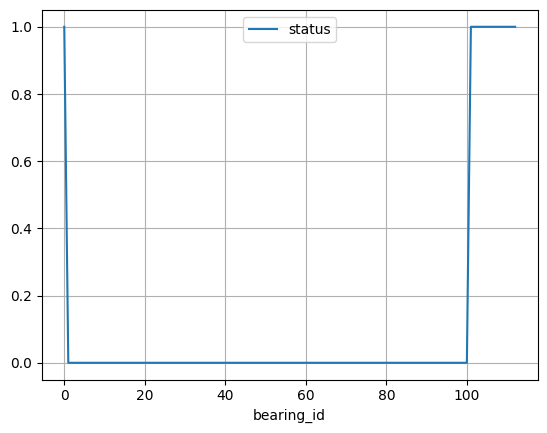

In [ ]:
labels.plot(x = 'bearing_id', y  = "status", grid = "on", kind = "line")

Удаляем из списка статуса подшипников нулевой, так как он точно нормальный:

In [ ]:
labels = labels.drop(index= 0)

Вывод номеров нормальных подшипников:

In [ ]:
labels_status_norm = labels['bearing_id'][labels['status']==1].values
labels_status_norm

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112])

Вывод номеров дефектных подшипников:

In [ ]:
labels_status_defect = labels['bearing_id'][labels['status']==0].values
labels_status_defect

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

## Анализ показателей одного эксперимента

In [ ]:
id_experiment = 105
experiment = signals[signals['experiment_id']==id_experiment]

In [ ]:
experiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98100 entries, 9501600 to 9599699
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   experiment_id  98100 non-null  int64  
 1   bearing_1_id   98100 non-null  int64  
 2   bearing_2_id   98100 non-null  int64  
 3   timestamp      98100 non-null  float64
 4   a1_x           98100 non-null  float64
 5   a1_y           98100 non-null  float64
 6   a1_z           98100 non-null  float64
 7   a2_x           98100 non-null  float64
 8   a2_y           98100 non-null  float64
 9   a2_z           98100 non-null  float64
 10  hz             98100 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 9.0 MB


In [ ]:
experiment.describe()

,experiment_id,bearing_1_id,bearing_2_id,timestamp,a1_x,a1_y,a1_z,a2_x,a2_y,a2_z,hz
count,98100.0,98100.0,98100.0,98100.000000,98100.000000,98100.000000,98100.000000,98100.000000,98100.000000,98100.000000,98100.000000
mean,105.0,0.0,105.0,16.349833,-0.144776,0.058137,0.109293,0.007584,0.086057,-0.102846,16.199306
std,0.0,0.0,0.0,9.439725,1.431331,0.888339,1.684738,1.503100,0.985178,1.199213,8.991711
min,105.0,0.0,105.0,0.000000,-7.774828,-4.771288,-11.057913,-6.794331,-4.034473,-7.118788,0.000000
25%,105.0,0.0,105.0,8.174917,-0.656302,-0.323466,-0.494403,-0.658051,-0.382221,-0.641806,6.802721
50%,105.0,0.0,105.0,16.349833,-0.079124,0.055072,0.177821,0.002779,0.098338,-0.143576,19.607843
75%,105.0,0.0,105.0,24.524750,0.498054,0.433610,0.946076,0.663609,0.578898,0.454299,24.793388
max,105.0,0.0,105.0,32.699667,6.269831,4.786797,8.436565,7.083102,4.807820,5.336947,25.423729


Визуализация эксперимента:

In [ ]:
fig = px.line(experiment, x="timestamp", y=["a2_x","a1_x"], title='Вибрации обоих акселерометров по оси x')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Спектр мощности сигнала:

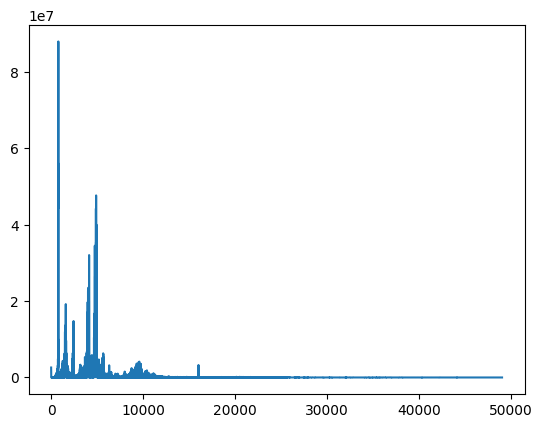

In [ ]:
fftData=abs(np.fft.rfft(experiment['a2_x']))**2

plt.plot(fftData[1:])

In [ ]:
fig = px.line(experiment, x="timestamp", y=["a2_y","a1_y"], title='Вибрации обоих акселерометров по оси y')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
fig = px.line(experiment, x="timestamp", y=["a2_z","a1_z"], title='Вибрации обоих акселерометров по оси z')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
fig = px.line(experiment, x="timestamp", y=["hz"], title='Скорость вращения')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

## Анализ показателей нескольких экспериментов. Генерация признаков

Берем данные эксперимента , где скорость вращения двигателя более стабильна:

In [ ]:
steady_filter = (experiment['hz'] > 24) & (experiment['hz'] < 27)
experiment_steady_speed = experiment[steady_filter]


In [ ]:
fig = px.line(experiment_steady_speed, x="timestamp", y=["hz"], title='Скорость вращения ')
fig.show()

In [ ]:
experiment_steady_speed['a2_y'].describe()

count    37371.000000
mean         0.081133
std          1.222642
min         -3.842249
25%         -0.766669
50%          0.098338
75%          0.963345
max          4.711709
Name: a2_y, dtype: float64

Функции генерации признаков:

In [ ]:
#функция определения максимального абсолютного значения
def get_peak_acceleration(signal):
    return pd.DataFrame.max(signal.abs())

In [ ]:
#функция определения стандартного отклонения
def get_std(signal):
    return signal.std()

In [ ]:
#функция определения дисперсии
def get_variance(signal):
    return signal.var()

In [ ]:
#функция определения асимметрии распределения
def get_skewness(signal):
    return signal.skew()

In [ ]:
#функция определения эксцесса распределения
def get_kurtosis(signal):
    return signal.kurtosis()

In [ ]:
#функция определения частоты основного тона
def get_tone_frequency(signal):
    fftData=abs(np.fft.rfft(signal))**2
    which = fftData[1:].argmax() + 1
    return which/100

In [ ]:
list_features_function = [get_peak_acceleration, get_std, get_variance,
                          get_skewness, get_kurtosis,get_tone_frequency]

Теперь обработаем все эксперименты функциями, полученных выше, для получения признаков:

In [ ]:
experiments = signals['experiment_id'].unique()
data_stationary_features = []
for exp in experiments:
    experiment = signals[(signals['experiment_id']==exp)]
    steady_filter = (experiment['hz'] > 24) & (experiment['hz'] < 27)
    experiment_steady = experiment[steady_filter]
    feature_a1_y = []
    feature_a2_y = []
    feature_a2_x = []
    for func in list_features_function:
        a1 = func(experiment_steady['a1_y'])
        a2 = func(experiment_steady['a2_y'])
        a3 = func(experiment_steady['a2_x'])
        if type(a1) == list:
            feature_a1_y+=a1
            feature_a2_y+=a2
            feature_a2_x+=a3
        else:
            feature_a1_y.append(a1)
            feature_a2_y.append(a2)
            feature_a2_x.append(a3)


    data_stationary_features.append((feature_a1_y,feature_a2_y,feature_a2_x))





Всего может быть получено 6 х 6 = 36 признаков.

In [ ]:
data_stationary_features = np.array(data_stationary_features,ndmin=3)
df_first = pd.DataFrame(data_stationary_features[:,0,:]) # df_first - это данные признаков первого подшипника в каждом эксперименте по ускорению а1_y
df_second = pd.DataFrame(data_stationary_features[:,1,:])# df_second - это данные признаков второго подшипника в каждом эксперименте по ускорению а2_y
df_third = pd.DataFrame(data_stationary_features[:,2,:]) # df_third- это данные признаков второго подшипника в каждом эксперименте по ускорению а2_x


Вывод значений признаков по первому подшипнику:

In [ ]:
df_first

,0,1,2,3,4,5
0,4.786797,1.240943,1.539939,0.171874,-0.211842,3.04
1,4.029721,1.089269,1.186506,-0.084968,-0.187444,3.09
2,4.597528,1.076600,1.159067,-0.052527,-0.062624,3.03
3,4.881431,1.053053,1.108920,0.135117,-0.077723,3.12
4,4.676653,1.194776,1.427489,-0.079056,-0.148830,3.07
...,...,...,...,...,...,...
107,6.947881,2.033918,4.136821,-0.097918,-0.369485,6.36
108,6.001536,1.247146,1.555374,0.071729,-0.441914,9.38
109,6.190805,1.461846,2.136995,-0.363958,-0.135666,9.75
110,4.771288,1.217735,1.482877,0.012379,-0.532472,9.68


In [ ]:
fig =px.bar(df_first)
fig.update_yaxes(range=[0,150])
fig.show()

Вывод значений признаков по второму подшипнику:

In [ ]:
df_second

,0,1,2,3,4,5
0,7.979513,2.362640,5.582067,0.211537,-0.559279,3.04
1,6.730058,2.010370,4.041588,-0.127512,-0.461153,3.09
2,7.494501,2.070274,4.286034,-0.257122,-0.461904,3.03
3,7.306729,2.185033,4.774368,0.122575,-0.433994,3.12
4,7.787289,2.303893,5.307921,0.045110,-0.411461,3.07
...,...,...,...,...,...,...
107,8.556184,2.692889,7.251651,0.122564,-0.730786,6.36
108,6.633946,2.020642,4.082993,0.058271,-0.784878,9.38
109,7.018394,2.044801,4.181211,-0.031851,-0.624901,9.75
110,6.730058,2.017873,4.071810,-0.131368,-0.758132,9.68


In [ ]:
fig =px.bar(df_second)
fig.update_yaxes(range=[0,100])
fig.show()

In [ ]:
fig =px.bar(df_first[5])
fig.update_yaxes(range=[0,100])
fig.show()

Посмотрим номера экспериментов среди полученных признаков с выбросами:

In [ ]:
data = df_second[5] # в качестве признака для проверки берем 5 признак - основной тон

Функция определения экспериментов с неисправными подшипниками:

In [ ]:
def outliers(data):
    data_std = data.std()
    data_mean = data.mean()
    anomaly_cut_off = data_std*1.5

    lower_limit  = data_mean - anomaly_cut_off
    upper_limit = data_mean + anomaly_cut_off

    lower_limit, upper_limit

    outliers = data.where((data >upper_limit) | (data<lower_limit)).dropna()

    return outliers

Определим номера по предлагаемому признаку и значения функции.

Аномальные (неисправные) подшипники определялись с учетом отклонения на 3 сигма и на 1,5. В данном случае уровень отклонения от среднего может являться гиперпараметром:

In [ ]:
out = outliers(df_second[5])
out

76      9.48
77      9.53
78      9.30
85      9.72
96     10.25
98      9.54
99      9.28
104     9.39
106     8.69
108     9.38
109     9.75
110     9.68
111     9.38
Name: 5, dtype: float64

## Итоги

Разобрали пример задачи определения неисправных подшипников:
1. Загрузили и предобработали данные.
2. Сделали выборку данных на основании физических выводов.
3. Подготовили и реализовали функции генерации признаков классификации подшипников на основе статистики временных рядов экспериментов и  вычисления основного тона вибраций.
4. Реализовали классификатор по показателю основного тона вибраций.

